# Willkommen
Hier ein paar informationen:
* Am besten einfach alles einmal ausführen (mit der run all cells funktion, oder ganz oft SHIFT+ENTER drücken)
* Dann diese Kommentare lesen

In [89]:
if get_ipython().__class__.__module__ == "google.colab._shell":
    print("running in google colab, fetching resources")
    %pip install colorama
    !git clone https://github.com/bastinat0r/Plenardebatten.git
    path = "Plenardebatten/data"
else:
    path = "data"

In [256]:
import xml.etree.ElementTree as ET
import pandas as pd
import datetime
import glob, os
import seaborn as sns
import re
import matplotlib.pyplot as plt
from colorama import Fore
import numpy as np

## Keywords
* Das sind die Keywords nach denen gesucht werden soll
* Keywords können später auch wieder gefiltert werden, also braucht man nicht zu sparen
* Ein keyword besteht aus 2 Teilen
  * Vorm Doppelpunkt ein "Name"
  * Hinter dem Doppelpunkt einige ["Suchbegriffe", "Einer geht auch"]
* Wichtig: Der Text der Plenardebatten wird vor dem Suchen bereinigt
  * Sonderzeichen wie ,.-? werden entfernt
  * Mehrere leerzeichen werden durch einzelne leerzeichen ersetzt
  * Alle Buchstaben werden zu kleinbuchstaben (also findet man unter "Klima" nichts unter "klima" schon mehr)
  * Aus "Herr Dr., was ist los?" wird zu "herr dr was ist los "
* Die Suchbegriffe sind Reguläre Ausdrücke - [Anleitung](https://de.wikibooks.org/wiki/Python_unter_Linux:_Reguläre_Ausdrücke#Ausdrücke_im_Überblick)

In [299]:
keywords={ 
    "no ed fridays": ["no education"],
    "schwänzen": ["schwänz[^\s]*"],
    "fff": ["friday[s]?\s?for\s?future"],
    "extinction rebellion": ["extinction (rebellion)?", " xr "],
    "hambacher forst": ["hambacher forst", "hambi bleibt"],
    "schulpflicht": ["schulpflicht"],
    "greta": ["(greta )+(thunberg)"],
    "annegret": ["kramp"],
    "energiewende": ["energiewende"],
    "paris": ["pariser\s?(klimaschutz)?\s?abkommen", "klimaziele"],
    "co2": ["\sco\s?2\s"],
    "kohleausstieg": ["kohleausstieg", "ausstieg aus der (braun)?kohle"],
    "profis": ["de[mn]\sprofi[s]?\süberlassen"],
    "scientists ff": ["scientists\s?for\s?future"]
         }

In [300]:
# bereinigt ein stück text wie beschrieben
def clean(s):
    replacements = [".", ":", ",", "?", "!", "-", "(", ")", "–", ";", "/", "„", "“", "”", "\"", "#"]
    for r in replacements:
        s = s.replace(r, " ")
    whitespace = re.compile("\s+")
    s, _ = whitespace.subn(" ", s)
    return s.lower()

# liest und analysiert ein xml file
def df_from_xml(filename, keywords=keywords):
    tree = ET.parse(filename)
    root = tree.getroot()
    date = tree.find(".//datum").attrib["date"]
    nr = int(root.attrib["sitzung-nr"])
    peri
    #print(nr)
    #print("  ", date)

    
    data = {}
    dataframes = []
            
    day = int(date.split(".")[0])
    month = int(date.split(".")[1])
    year = int(date.split(".")[2])
    data["date"] = datetime.date(year, month, day)
    data["sdate"] = date
    data["smonth"] = f"{month}-{year}"
    data["day"] = day
    data["year"] = year
    data["month"] = month
    data["nr"] = nr
    data["id"] = nr + 1000*periode
    
    for key, value in keywords.items():
        n = 0
        for word in value:
            matcher = re.compile(f"({word})")
            for p in root.findall(".//p"):
                text = ""
                if p.text is not None:
                    text = clean(p.text)
                found, num = matcher.subn(Fore.RED + r'\1' + Fore.RESET, text)
                if num > 0:
                    #print(f"{key}: {num}")
                    #print(found)
                    n += num
            
        data["word"] = key
        data["count"] = n
        dataframes.append(pd.DataFrame([data]))

    return dataframes

df = df_from_xml(f"{path}/19109-data.xml")
df

[         date       sdate  smonth  day  year  month   nr           word  count
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109  no ed fridays      0,
          date       sdate  smonth  day  year  month   nr       word  count
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109  schwänzen      0,
          date       sdate  smonth  day  year  month   nr word  count
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109  fff      0,
          date       sdate  smonth  day  year  month   nr  \
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109   
 
                    word  count  
 0  extinction rebellion      0  ,
          date       sdate  smonth  day  year  month   nr             word  \
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109  hambacher forst   
 
    count  
 0      0  ,
          date       sdate  smonth  day  year  month   nr          word  count
 0  2019-07-24  24.07.2019  7-2019   24  2019      7  109  schulpflicht      0,
          

In [301]:
# liest alle xml files im data ordner und analysiert die daten
files = glob.glob(f"{path}/*")
data = []
failed = []
for f in files:
    try:
        print(f)
        data = data + df_from_xml(f)
    except AttributeError:
        failed.append(f)
        print(f)
df = pd.concat(data)
df.set_index("nr", inplace=True)
df.sort_index(inplace=True)
df

data/19043-data.xml
data/19042-data.xml
data/19102-data.xml
data/19103-data.xml
data/19098-data.xml
data/19099-data.xml
data/19034-data.xml
data/19035-data.xml
data/19092-data.xml
data/19093-data.xml
data/19108-data.xml
data/19109-data.xml
data/19001-data.xml
data/19049-data.xml
data/19048-data.xml
data/19077-data.xml
data/19076-data.xml
data/19054-data.xml
data/19055-data.xml
data/19023-data.xml
data/19022-data.xml
data/19017-data.xml
data/19016-data.xml
data/19085-data.xml
data/19084-data.xml
data/19060-data.xml
data/19061-data.xml
data/19029-data.xml
data/19028-data.xml
data/19088-data.xml
data/19089-data.xml
data/19053-data.xml
data/19052-data.xml
data/19024-data.xml
data/19025-data.xml
data/19059-data.xml
data/19058-data.xml
data/19082-data.xml
data/19083-data.xml
data/19010-data.xml
data/19011-data.xml
data/19067-data.xml
data/19066-data.xml
data/19045-data.xml
data/19105-data.xml
data/19104-data.xml
data/19033-data.xml
data/19032-data.xml
data/19007-data.xml
data/19006-data.xml


,date,sdate,smonth,day,year,month,word,count
nr,,,,,,,,
1,2017-10-24,24.10.2017,10-2017,24,2017,10,schwänzen,0
1,2017-10-24,24.10.2017,10-2017,24,2017,10,greta,0
1,2017-10-24,24.10.2017,10-2017,24,2017,10,annegret,0
1,2017-10-24,24.10.2017,10-2017,24,2017,10,energiewende,0
1,2017-10-24,24.10.2017,10-2017,24,2017,10,paris,0
...,...,...,...,...,...,...,...,...
110,2019-09-10,10.09.2019,9-2019,10,2019,9,fff,3
110,2019-09-10,10.09.2019,9-2019,10,2019,9,schwänzen,0
110,2019-09-10,10.09.2019,9-2019,10,2019,9,no ed fridays,0


In [302]:
print(df["word"].unique())

['schwänzen' 'greta' 'annegret' 'energiewende' 'paris' 'co2'
 'kohleausstieg' 'profis' 'scientists ff' 'extinction rebellion' 'fff'
 'no ed fridays' 'schulpflicht' 'hambacher forst']


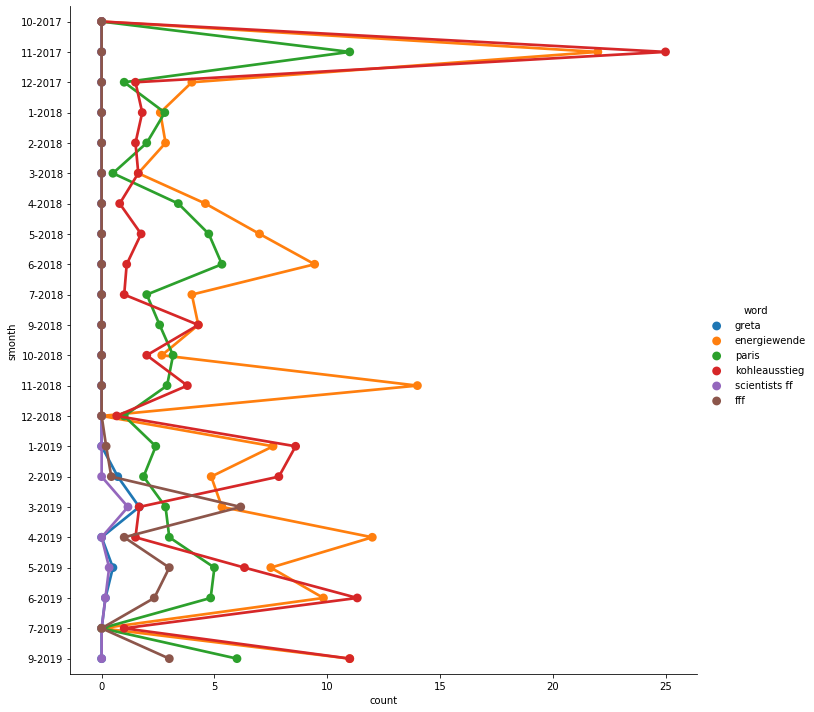

In [316]:
# filtert eine Liste von Keywords aus den Daten (alle anderen werden angezeigt)

df_filter = df.copy()
for word in ["annegret", "no ed fridays", "co2", "extinction rebellion", "profis", "schulpflicht", "schwänzen", "hambacher forst"]:
    df_filter = df_filter.loc[df_filter.word != word]

if False:
    erste = datetime.date(2018,5,1)
    df_filter = df_filter.loc[df_filter.date > erste]

# Erstellt eine Grafik aus den gefilterten Daten
sns.catplot(data=df_filter, y="smonth", x="count", hue="word", dodge=0, orient="h", kind="point", height=10, ci=None, estimator=np.mean)
plt.show()

In [304]:
df.groupby(["smonth", "word"]).sum()["count"]

smonth  word                
1-2018  annegret                 0
        co2                     21
        energiewende            13
        extinction rebellion     0
        fff                      0
                                ..
9-2019  paris                    6
        profis                   0
        schulpflicht             0
        schwänzen                0
        scientists ff            0
Name: count, Length: 308, dtype: int64

In [305]:
df.loc[df["count"] != 0]

,date,sdate,smonth,day,year,month,word,count
nr,,,,,,,,
2,2017-11-21,21.11.2017,11-2017,21,2017,11,co2,9
2,2017-11-21,21.11.2017,11-2017,21,2017,11,paris,11
2,2017-11-21,21.11.2017,11-2017,21,2017,11,energiewende,22
2,2017-11-21,21.11.2017,11-2017,21,2017,11,kohleausstieg,25
4,2017-12-12,12.12.2017,12-2017,12,2017,12,energiewende,8
...,...,...,...,...,...,...,...,...
110,2019-09-10,10.09.2019,9-2019,10,2019,9,paris,6
110,2019-09-10,10.09.2019,9-2019,10,2019,9,energiewende,11
110,2019-09-10,10.09.2019,9-2019,10,2019,9,annegret,2


In [306]:
a = df.loc[df.word == "fff"]
a.loc[a["count"] > 0]["date"]

nr
75     2019-01-18
79     2019-02-13
80     2019-02-14
85     2019-03-13
86     2019-03-14
87     2019-03-15
88     2019-03-20
90     2019-03-22
91     2019-04-03
92     2019-04-04
93     2019-04-05
95     2019-04-11
96     2019-04-12
97     2019-05-08
98     2019-05-09
99     2019-05-10
100    2019-05-15
103    2019-06-05
104    2019-06-06
105    2019-06-07
106    2019-06-26
108    2019-06-28
110    2019-09-10
Name: date, dtype: object

In [307]:
df["date"].unique()

array([datetime.date(2017, 10, 24), datetime.date(2017, 11, 21),
       datetime.date(2017, 12, 12), datetime.date(2017, 12, 13),
       datetime.date(2018, 1, 17), datetime.date(2018, 1, 18),
       datetime.date(2018, 1, 19), datetime.date(2018, 1, 22),
       datetime.date(2018, 1, 31), datetime.date(2018, 2, 1),
       datetime.date(2018, 2, 2), datetime.date(2018, 2, 21),
       datetime.date(2018, 2, 22), datetime.date(2018, 2, 23),
       datetime.date(2018, 2, 28), datetime.date(2018, 3, 1),
       datetime.date(2018, 3, 2), datetime.date(2018, 3, 14),
       datetime.date(2018, 3, 15), datetime.date(2018, 3, 16),
       datetime.date(2018, 3, 21), datetime.date(2018, 3, 22),
       datetime.date(2018, 3, 23), datetime.date(2018, 4, 18),
       datetime.date(2018, 4, 20), datetime.date(2018, 4, 25),
       datetime.date(2018, 4, 26), datetime.date(2018, 4, 27),
       datetime.date(2018, 5, 15), datetime.date(2018, 5, 16),
       datetime.date(2018, 5, 17), datetime.date(2018, 